# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

# Проверка гипотезы в Python, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

- Автор: Набойщикова Анастасия Дмитриевна
- Дата: 11.06.2025

## Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

Основной целью проекта является проведение анализа данных пользователей из двух городов — Москвы и Санкт-Петербурга, с целью проверки гипотезы о том, что пользователи из Санкт-Петербурга проводят больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.  

Проект включает в себя два этапа:  

Проверка гипотезы о различиях в среднем времени активности между пользователями из Санкт-Петербурга и Москвы с использованием t-теста.  

Оценка результатов A/B-тестирования для анализа влияния нового интерфейса на конверсию пользователей в покупателей в интернет-магазине BitMotion Kit.



## Описание данных  

Данные:  
    
https://code.s3.yandex.net/datasets/yandex_knigi_data.csv — файл с суммой часов их активности пользователей из Москвы и Санкт-Петербурга.  

Структура файла:  

- city — название города, в котором зарегистрирован пользователь;  
- puid — уникальный идентификатор пользователя;  
- hours — количество часов, проведённых пользователем в сервисе.  


## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

- Загрузка и предварительный анализ данных.  
- Очистка данных: удаление дубликатов.  
- Разделение данных по группам.  

Исследовательский анализ:  
- статистики распределений,  
- визуализация,  
- проверка нормальности распределения.   
- Проверка гипотезы (односторонний Welch’s t-test).  
- Интерпретация результатов.  
- Выводы и рекомендации. 

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/yandex_knigi_data.csv')

In [3]:
data.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


___Строк: 8784  
Колонок: 4   
Во всех колонках одинаковое количество строк, пропусков нет  
Типы данных в столбцах: float64, int64, object___  

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [5]:
# Проверяем данные на дубликаты 
duplicate_puids = data[data.duplicated(subset='puid')]

# Подсчитаем количество дубликатов
num_duplicates = len(duplicate_puids)

# Выводим количество дубликатов
print(f"Количество дубликатов пользователей: {num_duplicates}")

# Подсчитаем общее количество пользователей до удаления дубликатов
print(f"Общее количество пользователей до удаления дубликатов: {len(data)}")

# Удалим дубликаты пользователей
data_cleaned = data.drop_duplicates(subset='puid', keep='first')

# Подсчитаем количество пользователей после удаления дубликатов
print(f"Количество пользователей после удаления дубликатов: {len(data_cleaned)}")

Количество дубликатов пользователей: 244
Общее количество пользователей до удаления дубликатов: 8784
Количество пользователей после удаления дубликатов: 8540


___Были выявлены и удалены 244 дубликата___

Количество пользователей в Москве: 6234
Количество пользователей в Санкт-Петербурге: 2306

Статистика для Москвы:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

Статистика для Санкт-Петербурга:
count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64


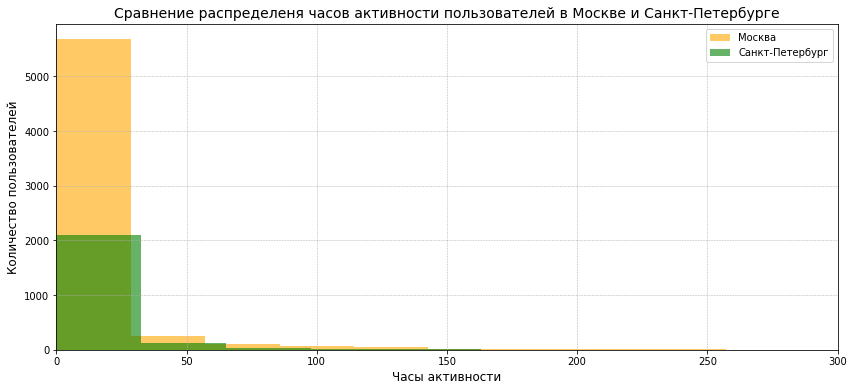

In [6]:
import matplotlib.pyplot as plt

# Разделим данные на группы по городам
moscow_data_cleaned = data_cleaned[data_cleaned['city'] == 'Москва']
spb_data_cleaned = data_cleaned[data_cleaned['city'] == 'Санкт-Петербург']

# Подсчитаем количество пользователей в каждой группе
print(f"Количество пользователей в Москве: {len(moscow_data_cleaned)}")
print(f"Количество пользователей в Санкт-Петербурге: {len(spb_data_cleaned)}")

# Выведем статистику по обеим группам
moscow_stats_cleaned = moscow_data_cleaned['hours'].describe()
spb_stats_cleaned = spb_data_cleaned['hours'].describe()

print("\nСтатистика для Москвы:")
print(moscow_stats_cleaned)

print("\nСтатистика для Санкт-Петербурга:")
print(spb_stats_cleaned)

# Визуализируем распределение данных по группам 
plt.figure(figsize=(14, 6))

# Гистограмма для Москвы
plt.hist(moscow_data_cleaned['hours'], bins=30, alpha=0.6, label='Москва', color='orange')

# Гистограмма для Санкт-Петербурга
plt.hist(spb_data_cleaned['hours'], bins=30, alpha=0.6, label='Санкт-Петербург', color='green')

# Устанавливаем диапазон оси X от 0 до 300 (для лучшей наглядности)
plt.xlim(0, 300)

# Добавляем сетку на график (для лучшей читаемости)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Добавляем заголовок и подписи осей
plt.title('Сравнение распределеня часов активности пользователей в Москве и Санкт-Петербурге', fontsize=14)
plt.xlabel('Часы активности', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Легенда
plt.legend()

# Покажем график
plt.show()

___Всего пользователей: 8540  
Количество пользователей в Москве: 6234  
Количество пользователей в Санкт-Петербурге: 2306___

___Для проверки нашей гипотезы мы выберем односторонний t-тест для независимых выборок (Welch's t-test) по следующим причинам:___  
___- Независимость выборок: наши группы пользователей из Москвы и Санкт-Петербурга представляют собой независимые выборки, так как активность пользователей из одного города никак не зависит от активности пользователей из другого.___    
___- Нормальность распределения: t-тест устойчив к умеренным нарушениям нормального распределения.___  
___- Несоответствие дисперсий: мы не знаем, похожи ли колебания активности в Москве и Санкт-петерьурге. Поэтому используем вариант t-теста, допускающий разные дисперсии (Welch's t-test).___. 

___Нулевая гипотеза H₀: Среднее время активности пользователей в Москве и Санкт-Петербурге одинаково.  
Альтернативная гипотеза H₁: Среднее время активности пользователей в Санкт-Петербурге больше.___

In [7]:
import scipy.stats as stats

# Проведем t-тест для проверки гипотезы

t_statistic, p_value = stats.ttest_ind(spb_data_cleaned['hours'], moscow_data_cleaned['hours'], equal_var=False, alternative='greater')

# Уровень значимости (стандартный уровень)
alpha = 0.05

# Выводим результаты t-теста
print(f"\nРезультаты t-теста:")
print(f"t-статистика: {t_statistic:.4f}")
print(f"p-значение: {p_value:.4f}")

# Интерпретация результатов
if p_value < alpha:
    print(f"Нулевая гипотеза отклоняется. Существует значительное различие в активности пользователей в пользу Санкт-Петербурга (p={p_value:.4f}).")
else:
    print(f"Нулевая гипотеза принимается. Наблюдается недостаточное доказательство различия в активности пользователей (p={p_value:.4f}).")




Результаты t-теста:
t-статистика: 0.4028
p-значение: 0.3436
Нулевая гипотеза принимается. Наблюдается недостаточное доказательство различия в активности пользователей (p=0.3436).


___Полученные результаты t-теста свидетельствуют о том, что нет статистически значимой разницы в активности пользователей из Москвы и Санкт-Петербурга. Различия, если они и имеются, настолько малы, что не превышают порог статистической значимости (p = 0.3436).___

## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



___1. Выбранный тип t-теста и уровень значимости:___  

Использовался односторонний t-тест для независимых выборок (Welch's t-test).  
Уровень значимости α=0.05.  

___2. Результат теста (p-value):___  

t-статистика: 0.4028  
p-value: 0.3436  

___3. Вывод на основе p-value:___ 

Так как p-value (0.3436) больше уровня значимости (α=0.05), соответсвенно нулевая гипотеза принимается.  
Между активностью пользователей из Москвы и Санкт-Петербурга нет статистически значимой разницы.  

___4. Возможные причины отсутствия различий:___  

Маленькая выборка для Санкт-Петербурга (всего 2306 пользователей против 6234 в Москве).  
Похожие привычки и модели поведения пользователей в обоих городах.

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель исследования — оценить влияние новой версии интерфейса сайта на поведение пользователей. Ожидаемый эффект — увеличение доли пользователей, совершающих покупку.

## 2. Загрузите данные, оцените их целостность.


In [8]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [9]:
# Информация о данных участников теста
print('Данные участников теста:')
print(participants.info())
print(participants.head())

# Информация о данных событий
print('\nДанные событий:')
print(events.info())
print(events.head())

Данные участников теста:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB
None
            user_id group                  ab_test   device
0  0002CE61FF2C4011     B        interface_eu_test      Mac
1  001064FEAAB631A1     B  recommender_system_test  Android
2  001064FEAAB631A1     A        interface_eu_test  Android
3  0010A1C096941592     A  recommender_system_test  Android
4  001E72F50D1C48FA     A        interface_eu_test      Mac

Данные событий:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id 

___Данные участников испытаний (participants):___  
Количество строк: 14 525.  
Столбцы: 4   
Во всех колонках одинаковое количество строк, пропусков нет  
Типы данных в столбцах: object    

__Данные событий (events):___  
Количество строк: 787 286.  
Столбцы:4  
Во всех колонках одинаковое количество строк, пропусков есть в столбце details, но он не является для нас значимым  
Типы данных в столбцах: datetime и object

___Вывод:___  
В данных participants и events нет пропущенных значений по ключевым столбцам, нужным для дальнейшего анализа.  
Данные участники разбиты на две группы (A и B), каждая из которых участвовала в своем эксперименте.  

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [10]:
# Проверим наличие дубликатов в участниках
dups_participants = participants.duplicated().sum()
print(f"Количество дубликатов в participants: {dups_participants}")

# Проверим наличие дубликатов в событиях
dups_events = events.duplicated().sum()
print(f"Количество дубликатов в events: {dups_events}")

# Удалим дубликаты из участников
participants_cleaned = participants.drop_duplicates()

# Удалим дубликаты из событий
events_cleaned = events.drop_duplicates()

# Подсчитаем количество строк после удаления дубликатов
print(f"Количество строк в participants после удаления дубликатов: {len(participants_cleaned)}")
print(f"Количество строк в events после удаления дубликатов: {len(events_cleaned)}")

Количество дубликатов в participants: 0
Количество дубликатов в events: 36318
Количество строк в participants после удаления дубликатов: 14525
Количество строк в events после удаления дубликатов: 750968


In [11]:
# Найдём пользователей, участвующих в нескольких тестах
crossover_check = participants_cleaned.groupby('user_id')['ab_test'].nunique()
users_in_multiple_tests = crossover_check[crossover_check > 1]

# Исключим этих пользователей из общего списка
clean_participants = participants_cleaned[~participants_cleaned['user_id'].isin(users_in_multiple_tests.index)]

# Выделим только участников теста 'interface_eu_test'
relevant_participants = clean_participants[clean_participants['ab_test'] == 'interface_eu_test']

# Проверим распределение по группам 
group_distribution = relevant_participants['group'].value_counts().loc[['A', 'B']]
print("\nРаспределение пользователей по группам после чистки:")
print(group_distribution)

# Повторная проверка на пересечение 
crossover_check_clean = clean_participants.groupby('user_id')['ab_test'].nunique()
users_in_multiple_tests_clean = crossover_check_clean[crossover_check_clean > 1]

# Вывод по результатам проверки
if users_in_multiple_tests_clean.empty:
    print("\nПересечения между тестами после чистки: не обнаружены ")
else:
    print("\nПересечения между тестами после чистки: обнаружены ")
    print(users_in_multiple_tests_clean)



Распределение пользователей по группам после чистки:
A    4952
B    5011
Name: group, dtype: int64

Пересечения между тестами после чистки: не обнаружены 


___Удалены дубликаты и участники, пересекавшиеся с другими тестами.___ 

___Оставлены пользователи, участвовавшие только в interface_eu_test.___  

___Распределение:___
- Группа A — 4952 пользователей
- Группа B — 5011 пользователей
___Распределение довольно равномерно.  

___Пересечений между тестами не обнаружено.___


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [12]:
# Получим список user_id, участвующих в interface_eu_test
relevant_user_ids = relevant_participants['user_id'].unique()

# Оставим только события этих пользователей
relevant_events = events_cleaned[events_cleaned['user_id'].isin(relevant_user_ids)].copy()

# Вывод результатов
print(f"Количество событий, связанных с пользователями теста 'interface_eu_test': {len(relevant_events)}")
print("Примеры событий:")
print(relevant_events.head())

Количество событий, связанных с пользователями теста 'interface_eu_test': 68074
Примеры событий:
                user_id            event_dt    event_name details
64672  5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0
64946  51278A006E918D97 2020-12-06 14:37:25  registration    -3.8
66585  A0C1E8EFAD874D8B 2020-12-06 17:20:22  registration   -3.32
67873  275A8D6254ACF530 2020-12-06 19:36:54  registration   -0.48
67930  0B704EB2DC7FCA4B 2020-12-06 19:42:20  registration     0.0


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [13]:
# Найдём дату регистрации для каждого пользователя
registrations = relevant_events[relevant_events['event_name'] == 'registration']
first_reg = registrations.groupby('user_id')['event_dt'].min().rename('registration_dt')

# Присоединим к таблице событий дату регистрации
relevant_events = relevant_events.merge(first_reg, on='user_id', how='left')

# Посчитаем lifetime (в днях)
relevant_events['lifetime_days'] = (relevant_events['event_dt'] - relevant_events['registration_dt']).dt.days

# Оставим события только за первые 7 дней
events_within_7_days = relevant_events[relevant_events['lifetime_days'] < 7].copy()

# Вывод результатов
print(f"\nКоличество событий за первые 7 дней после регистрации: {len(events_within_7_days)}")
print("Примеры событий:")
print(events_within_7_days.head())


Количество событий за первые 7 дней после регистрации: 58692
Примеры событий:
            user_id            event_dt    event_name details  \
0  5F506CEBEDC05D30 2020-12-06 14:10:01  registration     0.0   
1  51278A006E918D97 2020-12-06 14:37:25  registration    -3.8   
2  A0C1E8EFAD874D8B 2020-12-06 17:20:22  registration   -3.32   
3  275A8D6254ACF530 2020-12-06 19:36:54  registration   -0.48   
4  0B704EB2DC7FCA4B 2020-12-06 19:42:20  registration     0.0   

      registration_dt  lifetime_days  
0 2020-12-06 14:10:01              0  
1 2020-12-06 14:37:25              0  
2 2020-12-06 17:20:22              0  
3 2020-12-06 19:36:54              0  
4 2020-12-06 19:42:20              0  


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [14]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Заданные параметры
baseline = 0.30
target = 0.33  
alpha = 0.05
power = 0.80

# Эффект размера (Cohen's h)
effect_size = proportion_effectsize(baseline, target)

# Расчёт необходимого размера выборки на группу
analysis = NormalIndPower()
sample_size_per_group = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='two-sided')

print(f"Необходимое количество пользователей в каждой группе: {round(sample_size_per_group)}")

Необходимое количество пользователей в каждой группе: 3762


___Количество пользователей в группах (4952 и 5011) превышает необходимое — выборка достаточна для статистически значимых выводов.___

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [15]:
# Отфильтруем события с покупками
purchase_events = events_cleaned[(events_cleaned['user_id'].isin(relevant_participants['user_id'])) & 
                                 (events_cleaned['event_name'] == 'purchase')]  # если в данных 'purchase'

# Количество уникальных пользователей, сделавших покупку, по группам
buyers = purchase_events.groupby('user_id').size().reset_index()[['user_id']]
buyers = buyers.merge(relevant_participants[['user_id', 'group']], on='user_id', how='left')

# Считаем количество покупателей по группам
buyers_count = buyers.groupby('group')['user_id'].nunique()

# Считаем общее количество пользователей по группам
total_users = relevant_participants.groupby('group')['user_id'].nunique()

# Выводим результаты
print("Количество пользователей, сделавших покупку, по группам:")
print(buyers_count)

print("\nОбщее количество пользователей по группам:")
print(total_users)


Количество пользователей, сделавших покупку, по группам:
group
A    1638
B    1782
Name: user_id, dtype: int64

Общее количество пользователей по группам:
group
A    4952
B    5011
Name: user_id, dtype: int64


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

___Тест проведён корректно с учётом требований технического задания, данные очищены и подготовлены для анализа. Количество участников в каждой группе превышает необходимое для выявления статистически значимых изменений.___  

___По предварительным данным, в тестовой группе B наблюдается рост числа пользователей, совершивших покупку (1782 против 1638 в группе A), что может свидетельствовать о положительном влиянии новой версии сайта на конверсию.___  

___Для окончательных выводов потребуется провести статистический тест на значимость различий (например, z-тест пропорций), чтобы подтвердить, что улучшение не случайно.___

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

___H₀ Конверсия в группе B меньше или равна конверсии в группе A   
H₁ Конверсия в группе B больше, чем в группе A___

___Так как у нас две независимые выборки и бинарный исход (покупка / нет), используем Z-тест для пропорций (двусторонний).___

In [16]:
from statsmodels.stats.proportion import proportions_ztest

# Число пользователей, совершивших покупку, в группах B и A
buyers = [1782, 1638]  # B, A

# Общее число пользователей в группах B и A
total = [5011, 4952]

# Проводим односторонний Z-тест с альтернативой "B > A"
z_stat, p_value = proportions_ztest(count=buyers, nobs=total, alternative='larger')

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

Z-статистика: 2.6112
P-значение: 0.0045


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

___Выводы:___  
Рекомендуется внедрить новую версию интерфейса на основной сайт, так как она способствует росту продаж.  

___Рекомендации:___

- Зафиксировать успешные изменения и перейти к масштабированию.  
- Проводить аналогичные тесты при внесении дальнейших изменений.  